In [39]:
library(ggplot2)
library(reshape2)

In [22]:
head(economics_long)

date,variable,value,value01
1967-07-01,pce,507.4,0.0000000000
1967-08-01,pce,510.5,0.0002660008
1967-09-01,pce,516.3,0.0007636797
1967-10-01,pce,512.9,0.0004719369
1967-11-01,pce,518.1,0.0009181318
1967-12-01,pce,525.8,0.0015788435


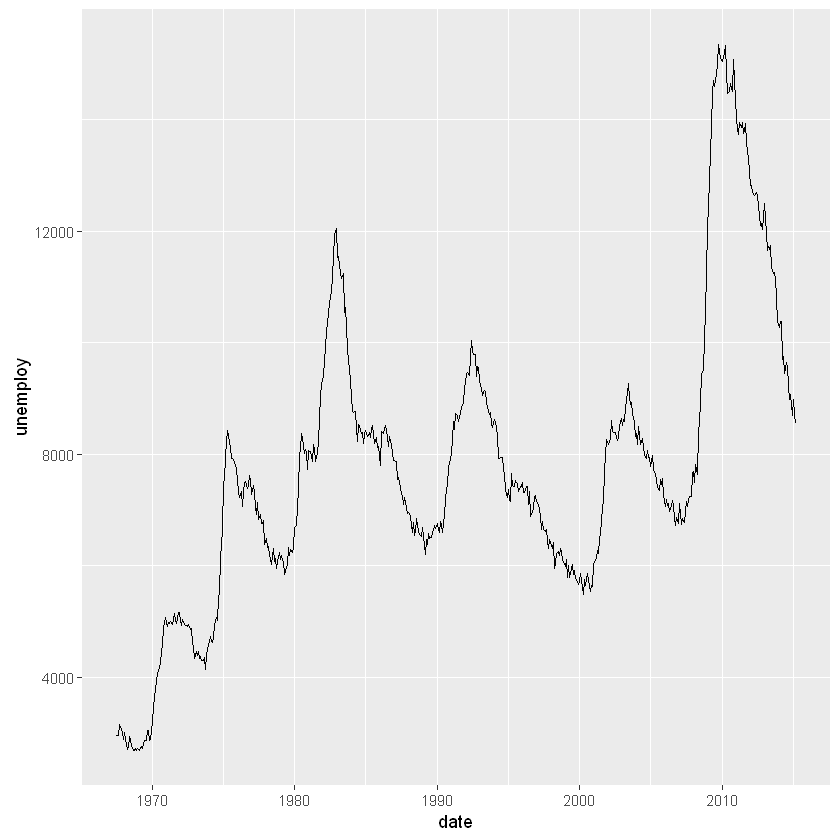

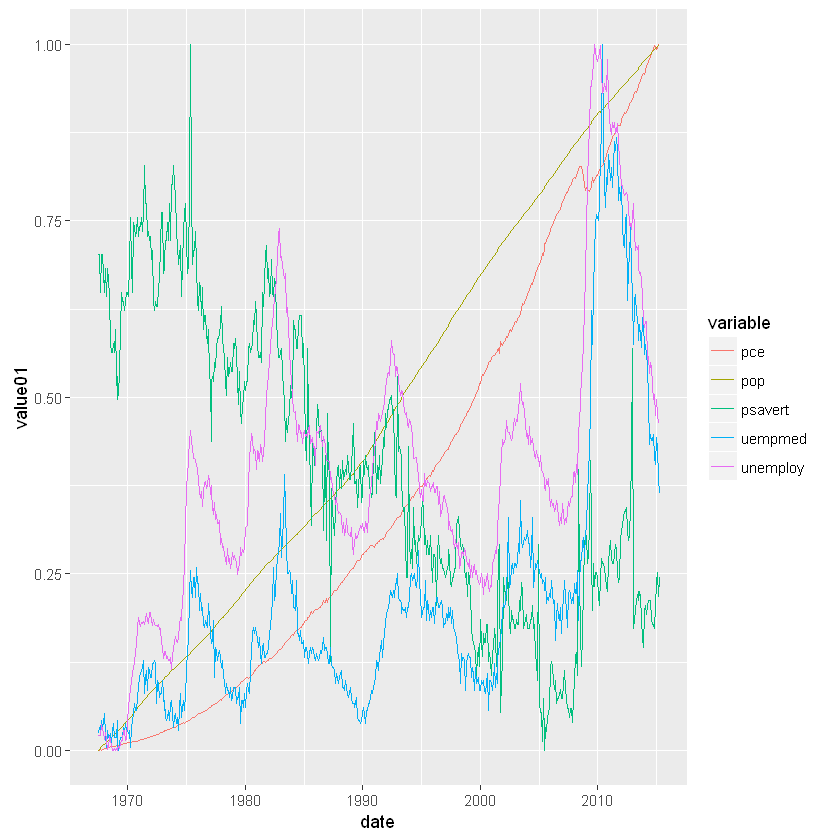

In [3]:
# geom_line() is suitable for time series
ggplot(economics, aes(date, unemploy)) + geom_line()
ggplot(economics_long, aes(date, value01, colour = variable)) +
  geom_line()


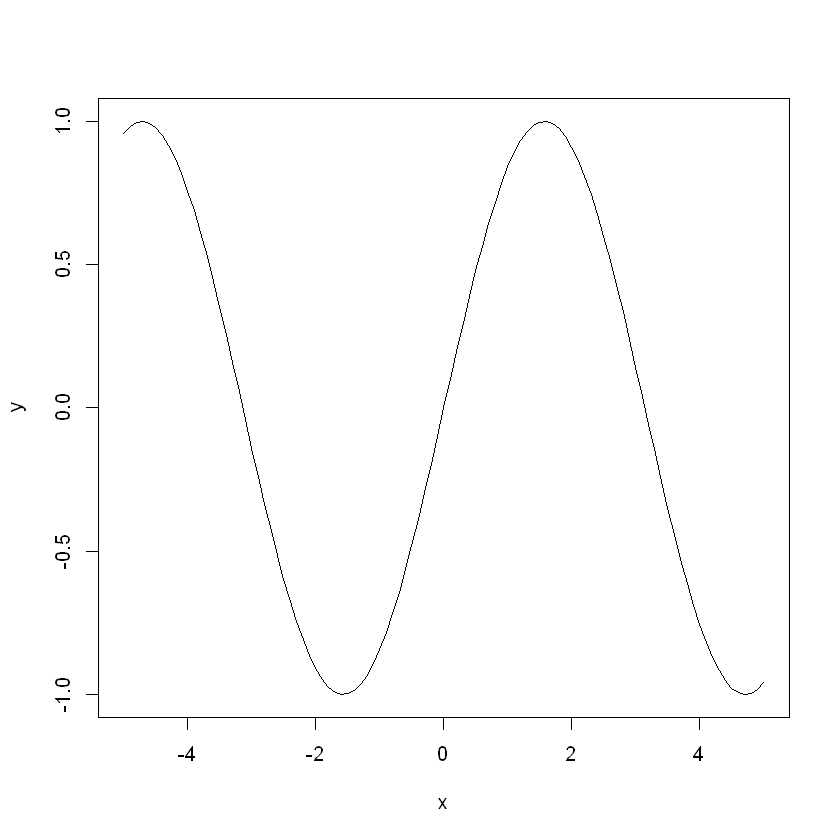

In [16]:
x <- seq(-5,5,0.1)
y <- sin(x)

plot(x,y,type="l")

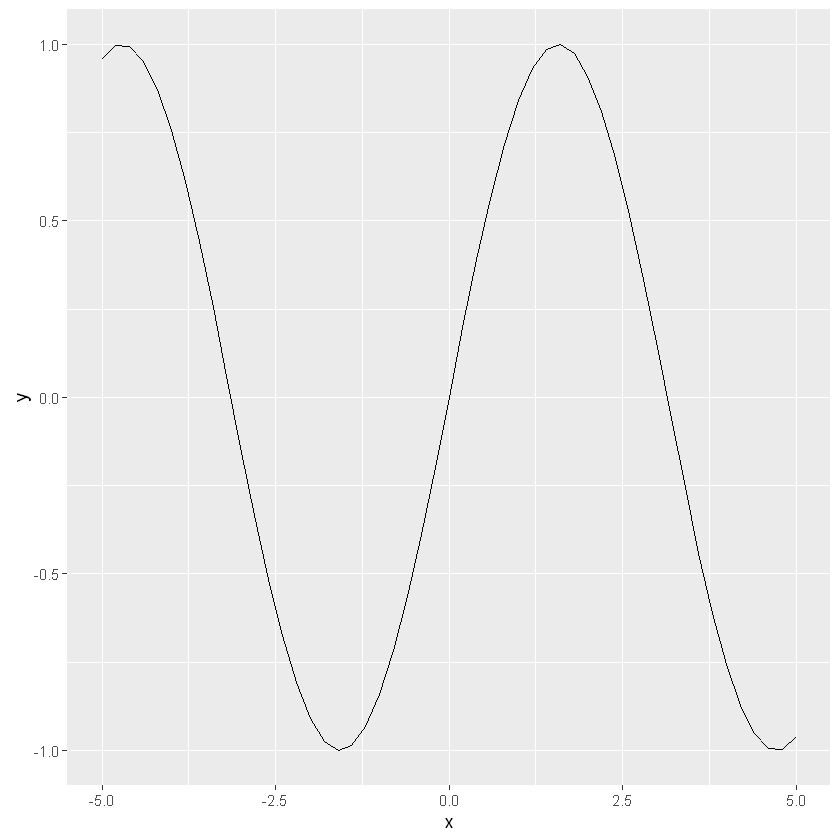

In [14]:
ggplot(data=NULL,aes(x,y)) +geom_line()

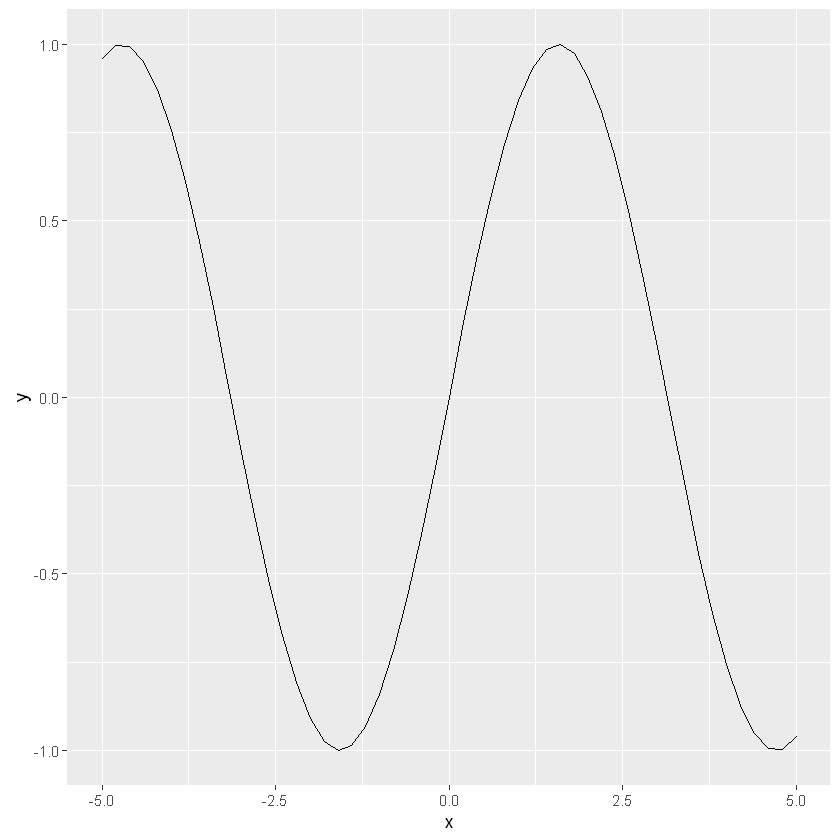

In [15]:
ggplot(data=NULL,aes(x,y)) +geom_line(lineend="round")

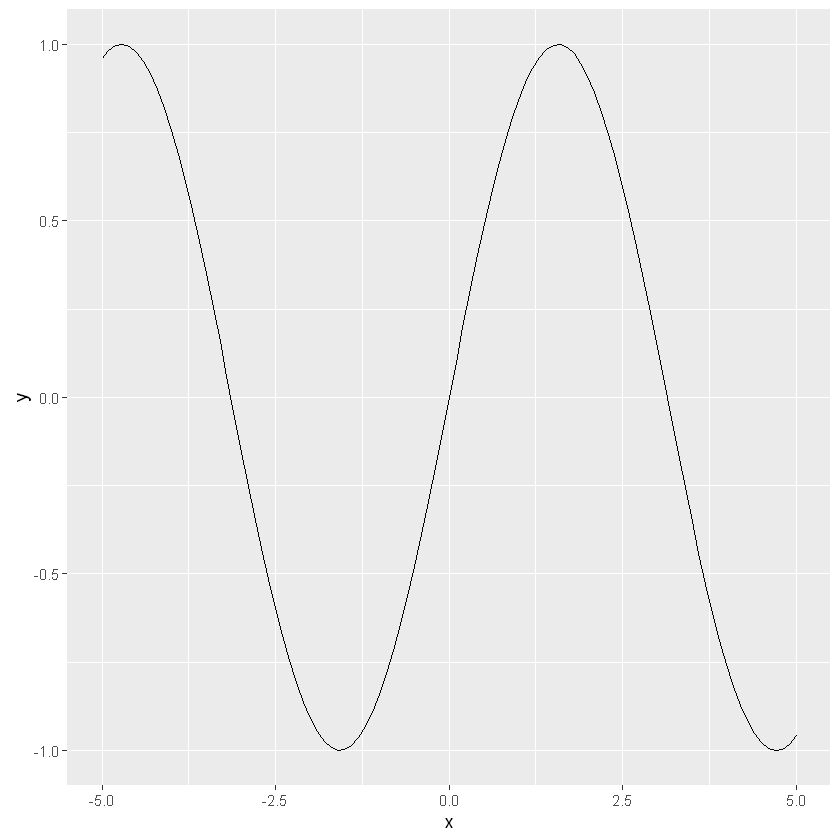

In [8]:
ggplot(data=NULL,aes(x,y)) +geom_line(lineend="butt")

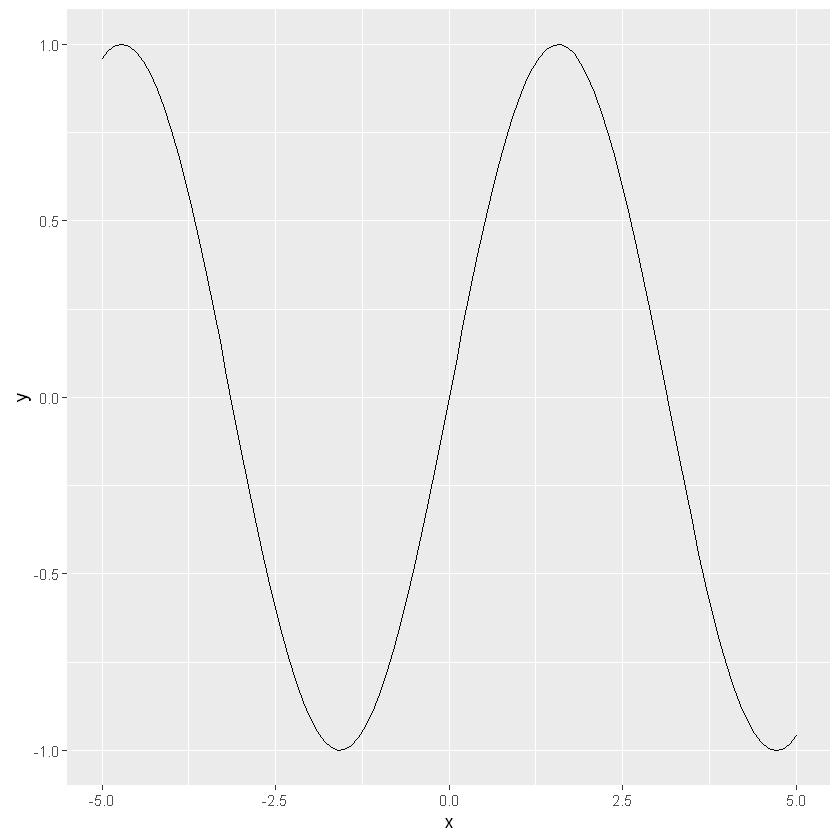

In [9]:
ggplot(data=NULL,aes(x,y)) +geom_line(lineend="square")

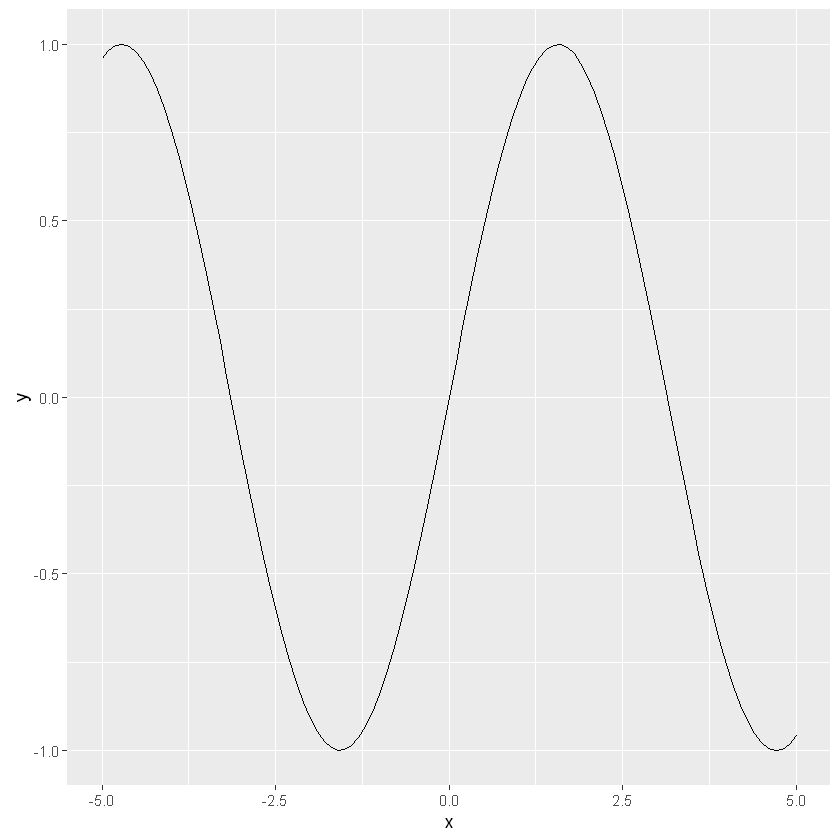

In [10]:
ggplot(data=NULL,aes(x,y)) +geom_line(linejoin="round")

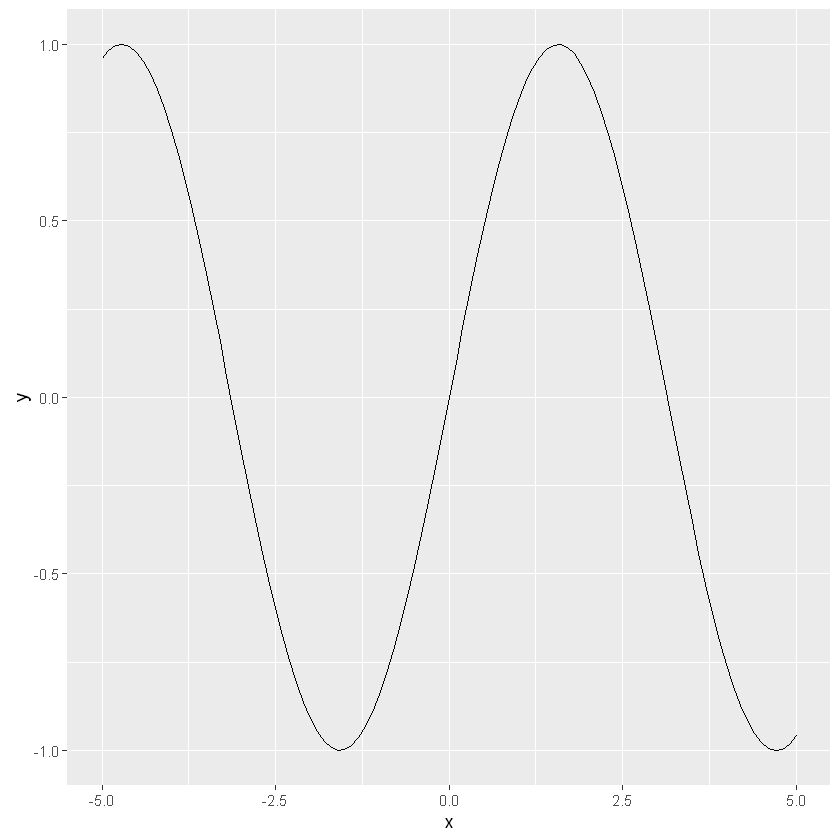

In [11]:
ggplot(data=NULL,aes(x,y)) +geom_line(linejoin="mitre")

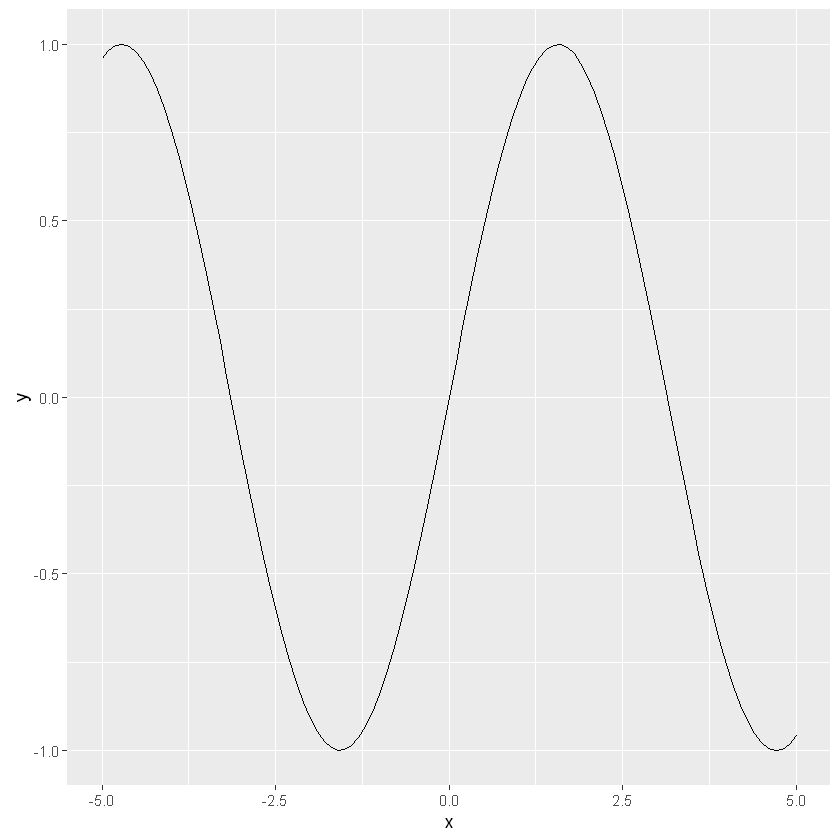

In [12]:
ggplot(data=NULL,aes(x,y)) +geom_line(linejoin="bevel")

In [17]:
power.binom <- function(x,n=10,x0=0,var=1,alpha=0.05){
    
    p0 <- pnorm(x0,x0,var,lower.tail=FALSE)
    left <- qbinom(alpha/2,n,p0)
    right <- qbinom(alpha/2,n,p0,lower.tail=FALSE)
    prob <- pnorm(x0,x,var)
    power <- pbinom(left-1,n,prob) + pbinom(right+1,n,prob,lower.tail=FALSE)
    return(power)
}

In [18]:
power.norm <- function(x,n=10,x0=0,var=1,alpha=0.05){
    left <- qnorm(alpha/2,x0,var/n)
    right <- qnorm(alpha/2,x0,var/n,lower.tail=FALSE)
    power <- pnorm(left,x,var/n) + pnorm(right,x,var/n,lower.tail=FALSE)
    return(power)
}

In [31]:
x <- seq(-0.5,0.5,0.01)
pb <- power.binom(x,n=100)
pn <- power.norm(x)

df = data.frame(x=x,pb=pb,pn=pn)

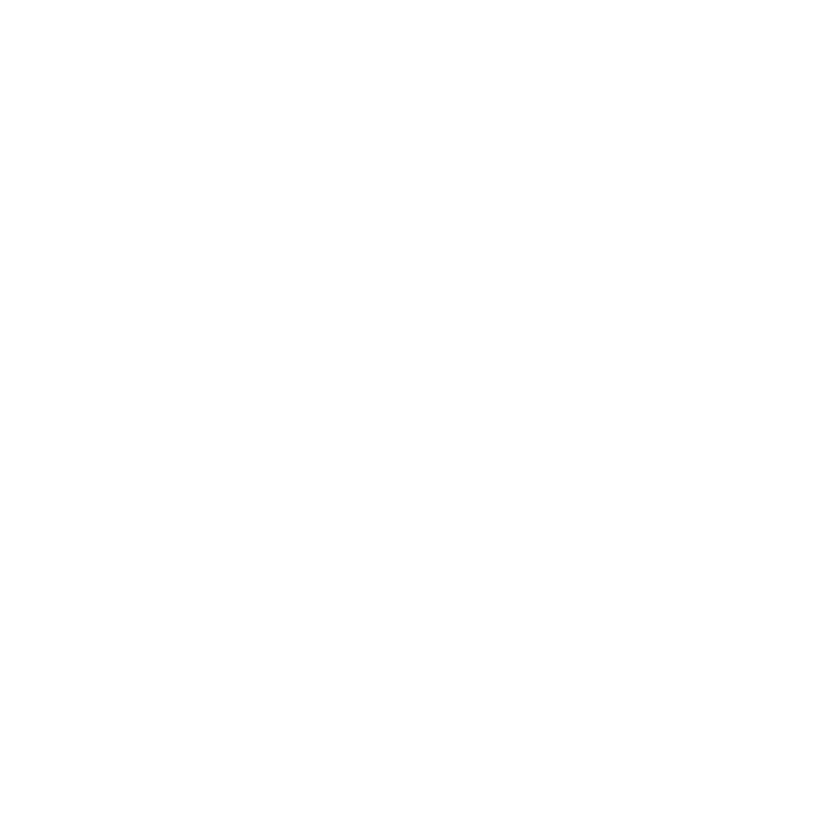

In [32]:
ggplot(data=df,aes(x)) + geom_line(aes(y = pb,colour="pb")) + geom_line(aes(y = pn),colour="pn")

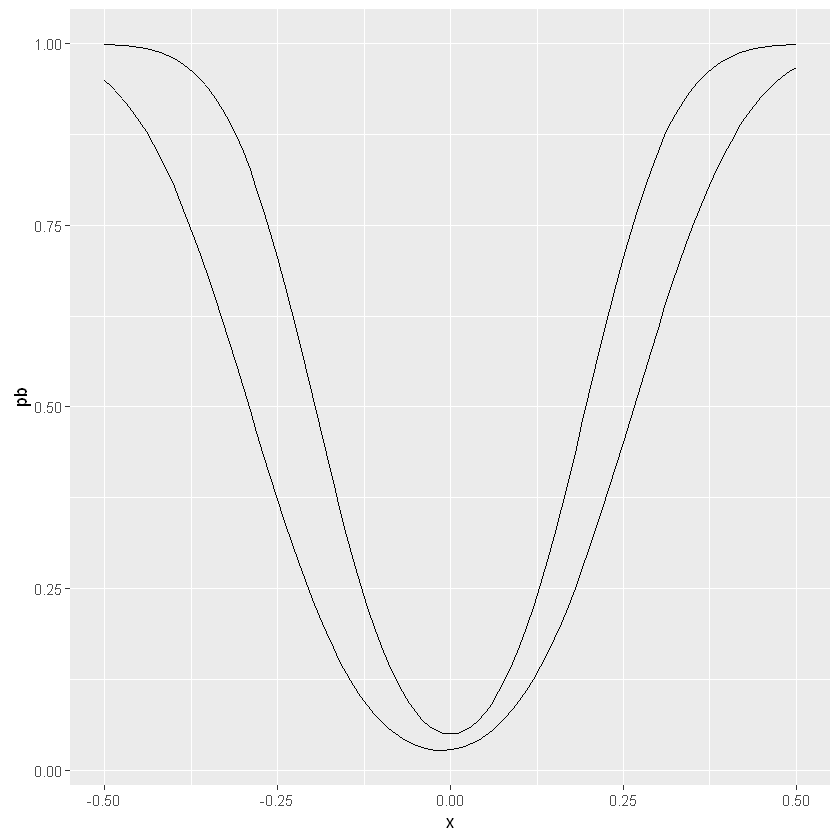

In [34]:
ggplot(data = df,aes(x)) + geom_line(aes(y=pb)) + geom_line(aes(y = pn)) + scale_colour_hue("variable")

In [36]:
head(df)

x,pb,pn
-0.50,0.9489940,0.9988173
-0.49,0.9402876,0.9983591
-0.48,0.9304521,0.9977446
-0.47,0.9194078,0.9969284
-0.46,0.9070809,0.9958551
-0.45,0.8934052,0.9944579


In [41]:
head(melt(df,id="x",measure=c("pb","pn")))

x,variable,value
-0.50,pb,0.9489940
-0.49,pb,0.9402876
-0.48,pb,0.9304521
-0.47,pb,0.9194078
-0.46,pb,0.9070809
-0.45,pb,0.8934052


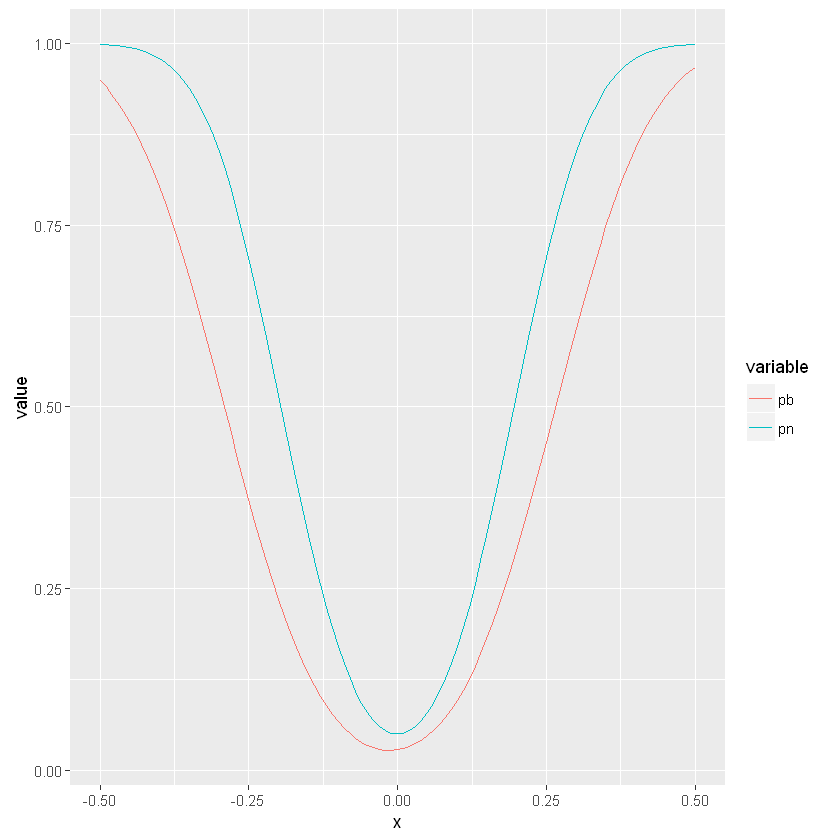

In [42]:
ggplot(data=melt(df,id="x",measure=c("pb","pn")),aes(x,value,colour = variable)) + geom_line()

In [50]:
x <- seq(-0.5,0.5,0.01)
pb50 <- power.binom(x,n=50)
pb100 <- power.binom(x,n=100)
pb200 <- power.binom(x,n=200)
pn <- power.norm(x)

df = data.frame(x=x,pn=pn,pb50=pb50,pb100=pb100,pb200=pb200)



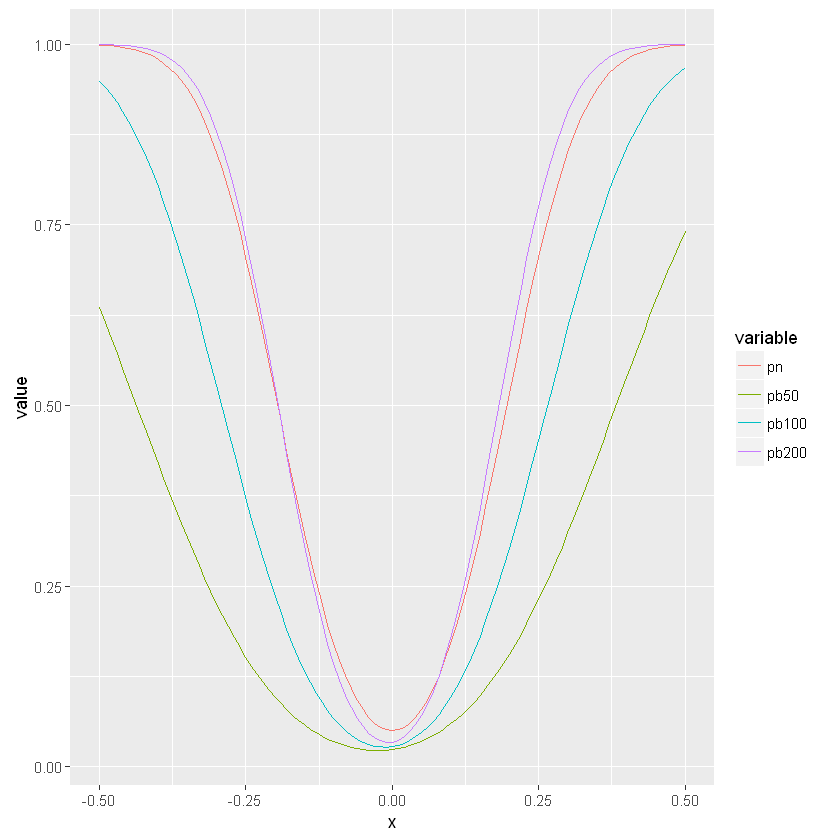

In [51]:
base <- ggplot(data=melt(df,id="x",measure=names(df)[names(df)!='x']),aes(x,value,colour = variable)) 
base + geom_line()

[1] "pb"    "pb50"  "pb100" "pb200"

In [53]:
dbinom(0:10,10,0.5)

[1] 0.0009765625 0.0097656250 0.0439453125 0.1171875000 0.2050781250
 [6] 0.2460937500 0.2050781250 0.1171875000 0.0439453125 0.0097656250
[11] 0.0009765625

In [54]:
qbinom(0.025,10,0.5)

[1] 2

In [55]:
qbinom(0.025,10,0.5,lower.tail=FALSE)

[1] 8

In [56]:
dbinom(0:10,10,0.5)[2]

[1] 0.009765625

In [57]:
dbinom(0:10,10,0.5)[8]

[1] 0.1171875

In [59]:
?qbinom

In [1]:
?points

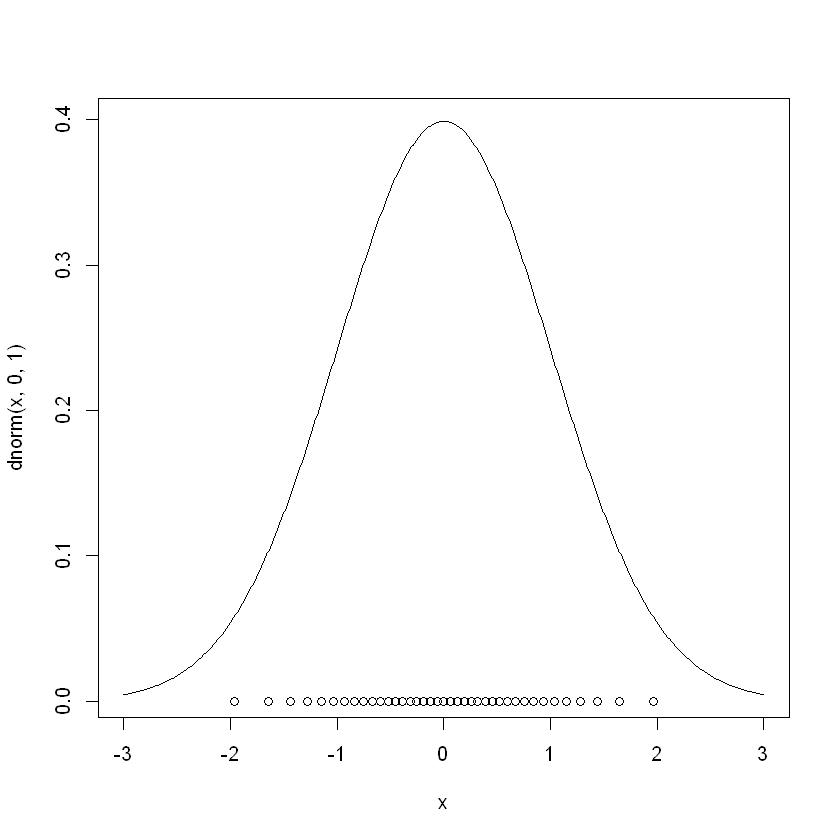

In [15]:
x <- seq(-3,3,0.01)
q2 <- seq(0,1,0.025)
x2 <- qnorm(q2,0,1)
plot(x,dnorm(x,0,1),type="l")
points(x2,rep(0,length(x2)))

In [12]:
rep(0,length(x2))

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [1]:
?par


legend> ## Run the example in '?matplot' or the following:
legend> leg.txt <- c("Setosa     Petals", "Setosa     Sepals",
legend+              "Versicolor Petals", "Versicolor Sepals")

legend> y.leg <- c(4.5, 3, 2.1, 1.4, .7)

legend> cexv  <- c(1.2, 1, 4/5, 2/3, 1/2)

legend> matplot(c(1, 8), c(0, 4.5), type = "n", xlab = "Length", ylab = "Width",
legend+         main = "Petal and Sepal Dimensions in Iris Blossoms")

legend> for (i in seq(cexv)) {
legend+   text  (1, y.leg[i] - 0.1, paste("cex=", formatC(cexv[i])), cex = 0.8, adj = 0)
legend+   legend(3, y.leg[i], leg.txt, pch = "sSvV", col = c(1, 3), cex = cexv[i])
legend+ }

legend> ## 'merge = TRUE' for merging lines & points:
legend> x <- seq(-pi, pi, len = 65)

legend> plot(x, sin(x), type = "l", ylim = c(-1.2, 1.8), col = 3, lty = 2)


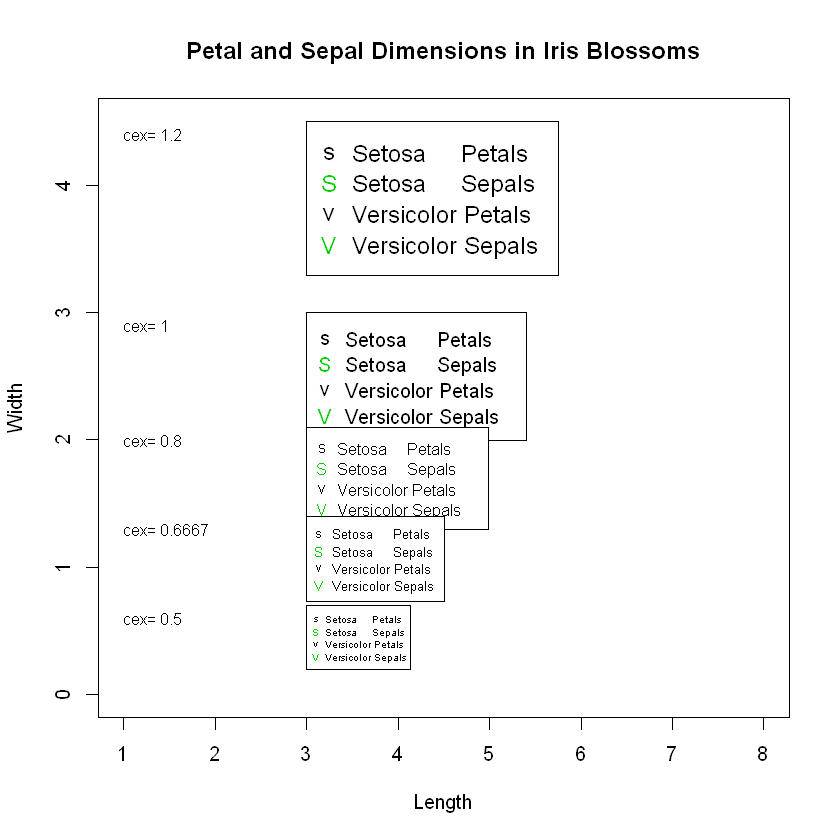


legend> points(x, cos(x), pch = 3, col = 4)

legend> lines(x, tan(x), type = "b", lty = 1, pch = 4, col = 6)

legend> title("legend(..., lty = c(2, -1, 1), pch = c(NA, 3, 4), merge = TRUE)",
legend+       cex.main = 1.1)

legend> legend(-1, 1.9, c("sin", "cos", "tan"), col = c(3, 4, 6),
legend+        text.col = "green4", lty = c(2, -1, 1), pch = c(NA, 3, 4),
legend+        merge = TRUE, bg = "gray90")

legend> ## right-justifying a set of labels: thanks to Uwe Ligges
legend> x <- 1:5; y1 <- 1/x; y2 <- 2/x

legend> plot(rep(x, 2), c(y1, y2), type = "n", xlab = "x", ylab = "y")


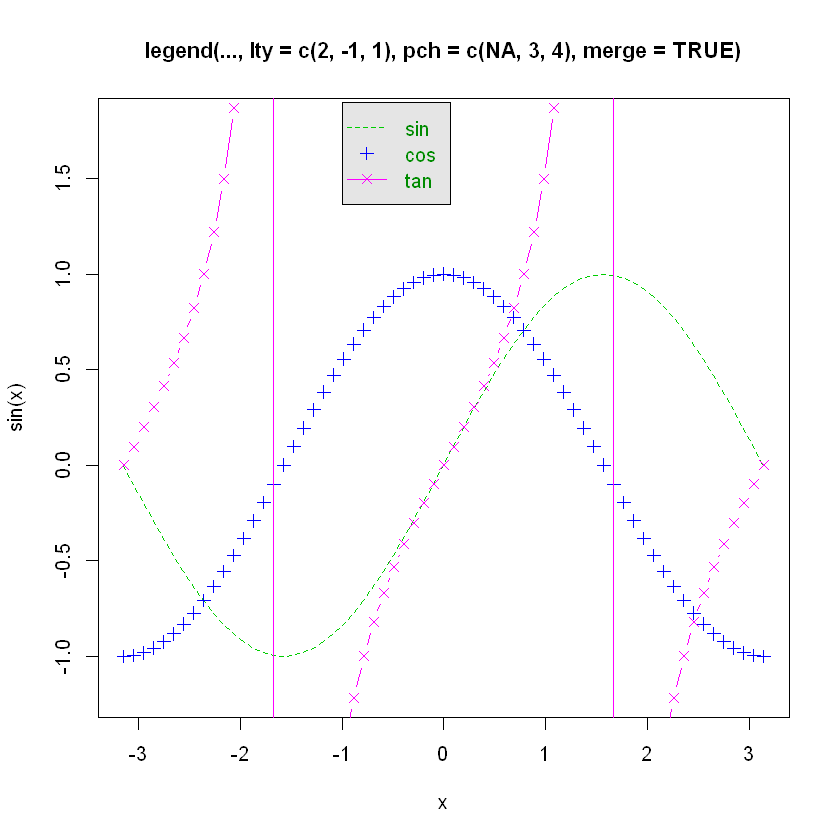


legend> lines(x, y1); lines(x, y2, lty = 2)

legend> temp <- legend("topright", legend = c(" ", " "),
legend+                text.width = strwidth("1,000,000"),
legend+                lty = 1:2, xjust = 1, yjust = 1,
legend+                title = "Line Types")

legend> text(temp$rect$left + temp$rect$w, temp$text$y,
legend+      c("1,000", "1,000,000"), pos = 2)

legend> ##--- log scaled Examples ------------------------------
legend> leg.txt <- c("a one", "a two")

legend> par(mfrow = c(2, 2))

legend> for(ll in c("","x","y","xy")) {
legend+   plot(2:10, log = ll, main = paste0("log = '", ll, "'"))
legend+   abline(1, 1)
legend+   lines(2:3, 3:4, col = 2)
legend+   points(2, 2, col = 3)
legend+   rect(2, 3, 3, 2, col = 4)
legend+   text(c(3,3), 2:3, c("rect(2,3,3,2, col=4)",
legend+                       "text(c(3,3),2:3,\"c(rect(...)\")"), adj = c(0, 0.3))
legend+   legend(list(x = 2,y = 8), legend = leg.txt, col = 2:3, pch = 1:2,
legend+          lty = 1, merge = TRUE)   #, trace 

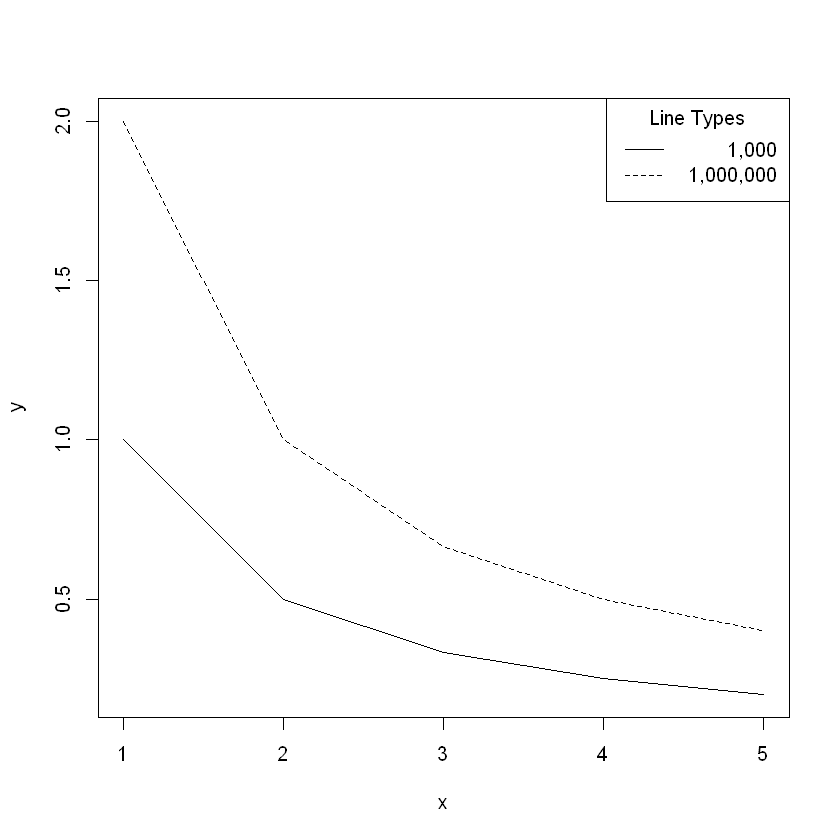


legend> par(mfrow = c(1,1))

legend> ##-- Math expressions:  ------------------------------
legend> x <- seq(-pi, pi, len = 65)

legend> plot(x, sin(x), type = "l", col = 2, xlab = expression(phi),
legend+      ylab = expression(f(phi)))


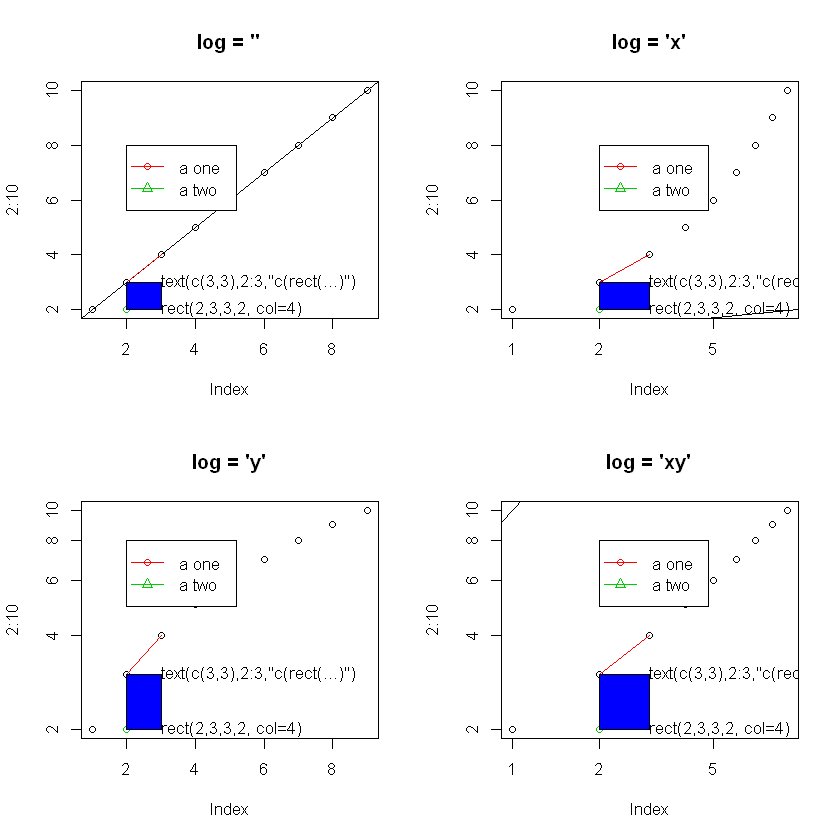


legend> abline(h = -1:1, v = pi/2*(-6:6), col = "gray90")

legend> lines(x, cos(x), col = 3, lty = 2)

legend> ex.cs1 <- expression(plain(sin) * phi,  paste("cos", phi))  # 2 ways

legend> utils::str(legend(-3, .9, ex.cs1, lty = 1:2, plot = FALSE,
legend+            adj = c(0, 0.6)))  # adj y !
List of 2
 $ rect:List of 4
  ..$ w   : num 1.28
  ..$ h   : num 0.269
  ..$ left: num -3
  ..$ top : num 0.9
 $ text:List of 2
  ..$ x: num [1:2] -2.25 -2.25
  ..$ y: num [1:2] 0.81 0.721

legend> legend(-3, 0.9, ex.cs1, lty = 1:2, col = 2:3,  adj = c(0, 0.6))

legend> require(stats)

legend> x <- rexp(100, rate = .5)

legend> hist(x, main = "Mean and Median of a Skewed Distribution")


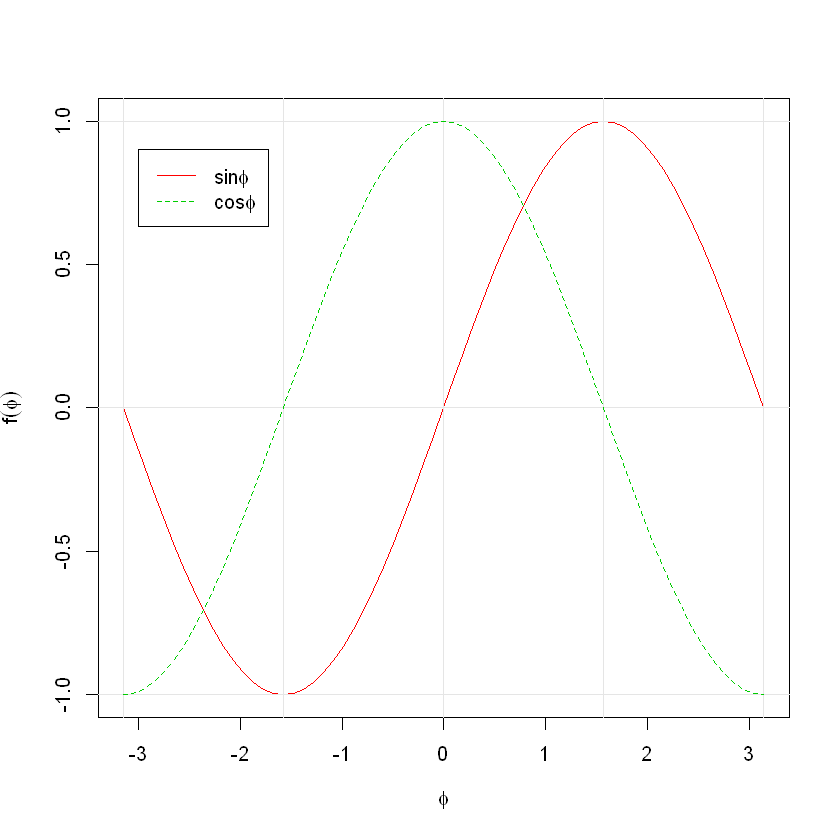


legend> abline(v = mean(x),   col = 2, lty = 2, lwd = 2)

legend> abline(v = median(x), col = 3, lty = 3, lwd = 2)

legend> ex12 <- expression(bar(x) == sum(over(x[i], n), i == 1, n),
legend+                    hat(x) == median(x[i], i == 1, n))

legend> utils::str(legend(4.1, 30, ex12, col = 2:3, lty = 2:3, lwd = 2))
List of 2
 $ rect:List of 4
  ..$ w   : num 5.1
  ..$ h   : num 9.99
  ..$ left: num 4.1
  ..$ top : num 30
 $ text:List of 2
  ..$ x: num [1:2] 5.41 5.41
  ..$ y: num [1:2] 25.9 21.8

legend> ## 'Filled' boxes -- for more, see example(plot.factor)
legend> op <- par(bg = "white") # to get an opaque box for the legend

legend> plot(cut(weight, 3) ~ group, data = PlantGrowth, col = NULL,
legend+      density = 16*(1:3))


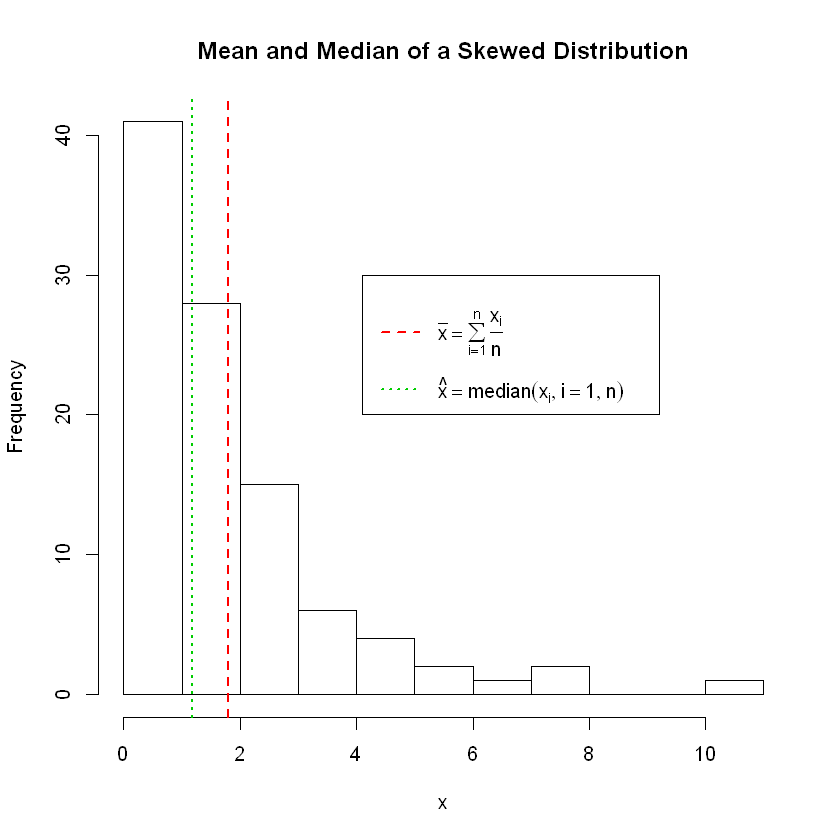


legend> par(op)

legend> ## Using 'ncol' :
legend> x <- 0:64/64

legend> matplot(x, outer(x, 1:7, function(x, k) sin(k * pi * x)),
legend+         type = "o", col = 1:7, ylim = c(-1, 1.5), pch = "*")


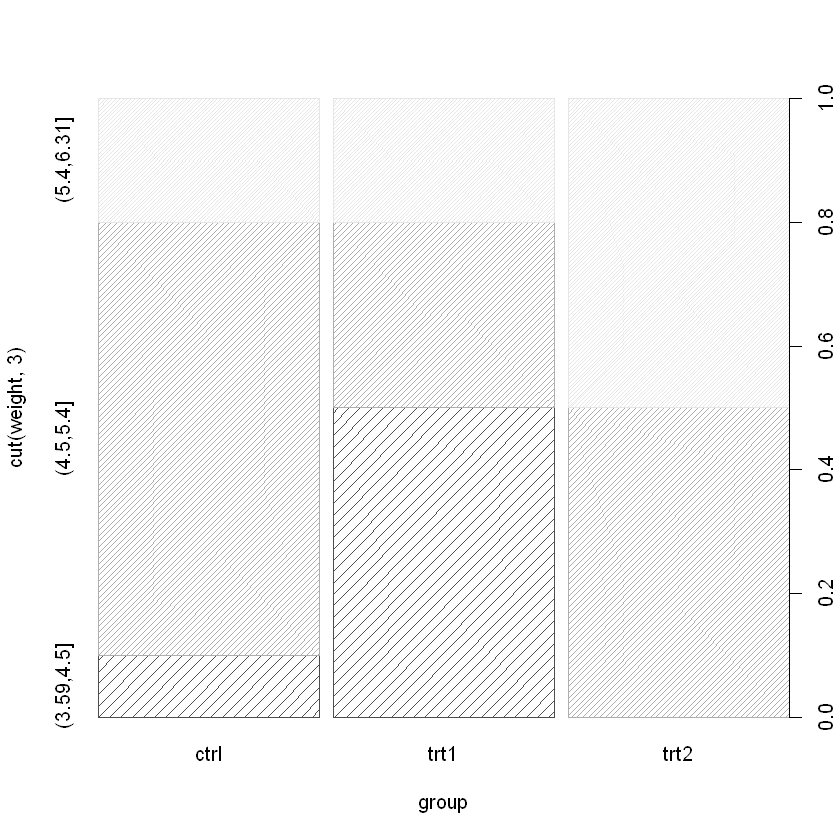


legend> op <- par(bg = "antiquewhite1")

legend> legend(0, 1.5, paste("sin(", 1:7, "pi * x)"), col = 1:7, lty = 1:7,
legend+        pch = "*", ncol = 4, cex = 0.8)

legend> legend(.8,1.2, paste("sin(", 1:7, "pi * x)"), col = 1:7, lty = 1:7,
legend+        pch = "*", cex = 0.8)

legend> legend(0, -.1, paste("sin(", 1:4, "pi * x)"), col = 1:4, lty = 1:4,
legend+        ncol = 2, cex = 0.8)

legend> legend(0, -.4, paste("sin(", 5:7, "pi * x)"), col = 4:6,  pch = 24,
legend+        ncol = 2, cex = 1.5, lwd = 2, pt.bg = "pink", pt.cex = 1:3)

legend> par(op)

legend> ## point covering line :
legend> y <- sin(3*pi*x)

legend> plot(x, y, type = "l", col = "blue",
legend+     main = "points with bg & legend(*, pt.bg)")


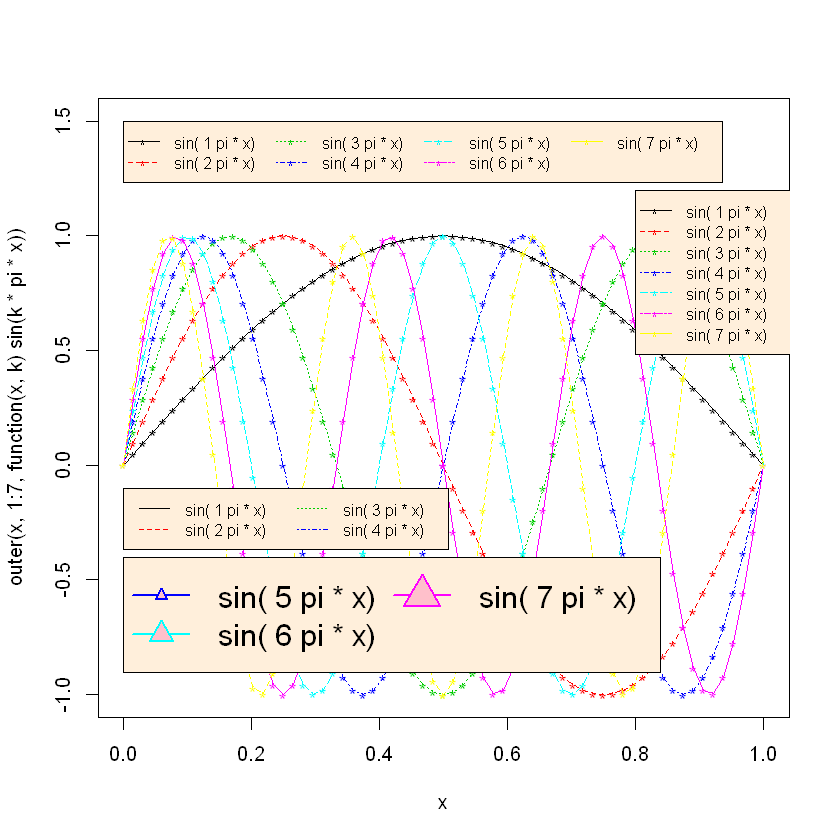


legend> points(x, y, pch = 21, bg = "white")

legend> legend(.4,1, "sin(c x)", pch = 21, pt.bg = "white", lty = 1, col = "blue")

legend> ## legends with titles at different locations
legend> plot(x, y, type = "n")


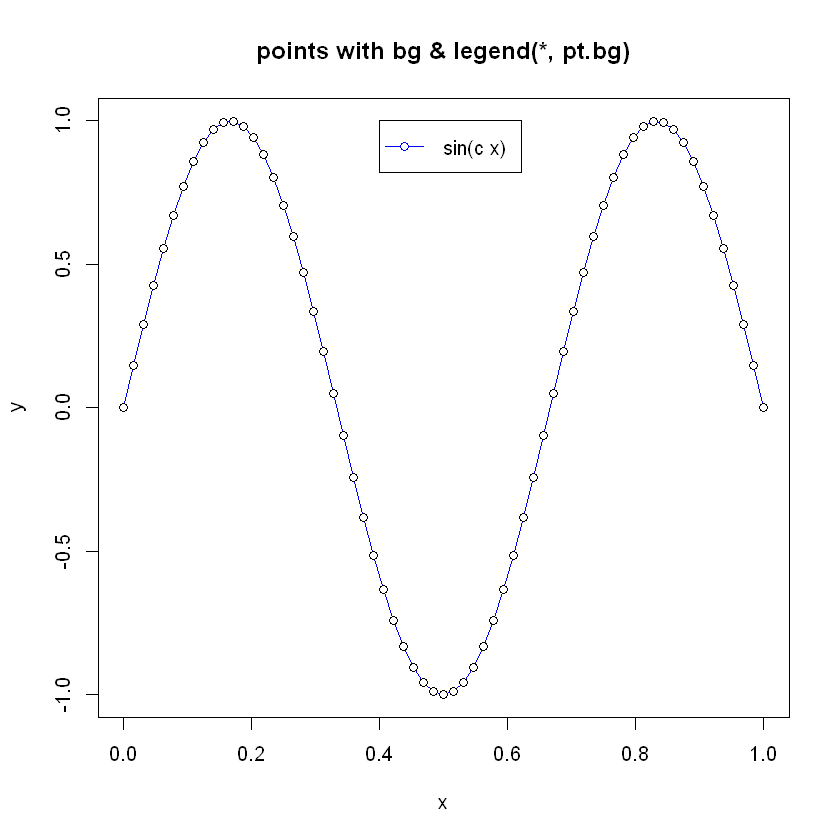


legend> legend("bottomright", "(x,y)", pch = 1, title = "bottomright")

legend> legend("bottom", "(x,y)", pch = 1, title = "bottom")

legend> legend("bottomleft", "(x,y)", pch = 1, title = "bottomleft")

legend> legend("left", "(x,y)", pch = 1, title = "left")

legend> legend("topleft", "(x,y)", pch = 1, title = "topleft, inset = .05",
legend+        inset = .05)

legend> legend("top", "(x,y)", pch = 1, title = "top")

legend> legend("topright", "(x,y)", pch = 1, title = "topright, inset = .02",
legend+        inset = .02)

legend> legend("right", "(x,y)", pch = 1, title = "right")

legend> legend("center", "(x,y)", pch = 1, title = "center")

legend> # using text.font (and text.col):
legend> op <- par(mfrow = c(2, 2), mar = rep(2.1, 4))

legend> c6 <- terrain.colors(10)[1:6]

legend> for(i in 1:4) {
legend+    plot(1, type = "n", axes = FALSE, ann = FALSE); title(paste("text.font =",i))
legend+    legend("top", legend = LETTERS[1:6], col = c6,
legend+           ncol = 2, cex = 2, lwd

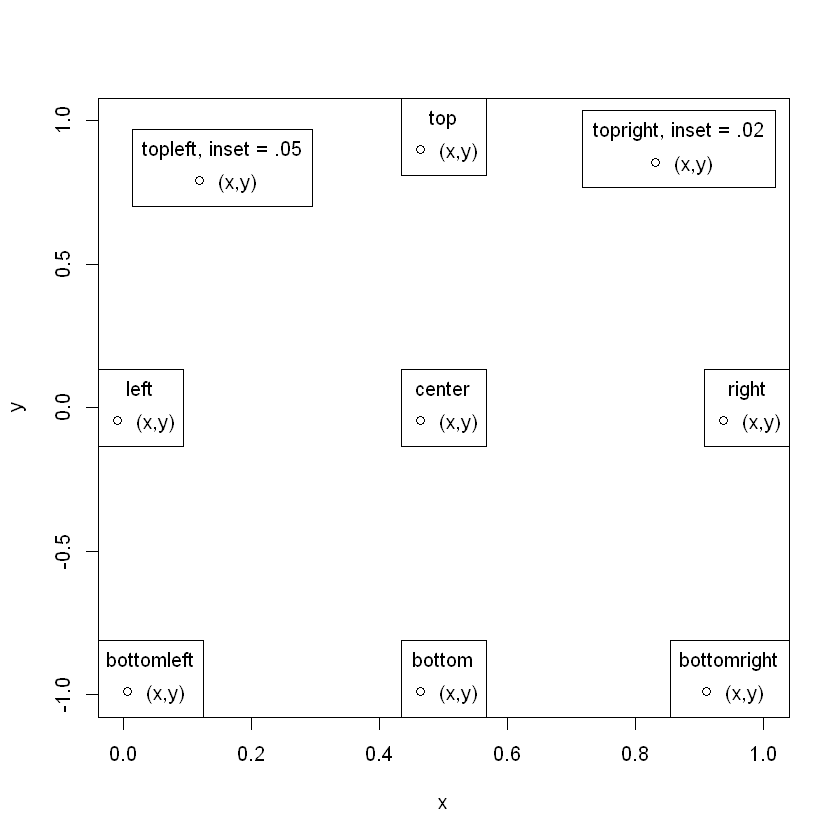


legend> par(op)


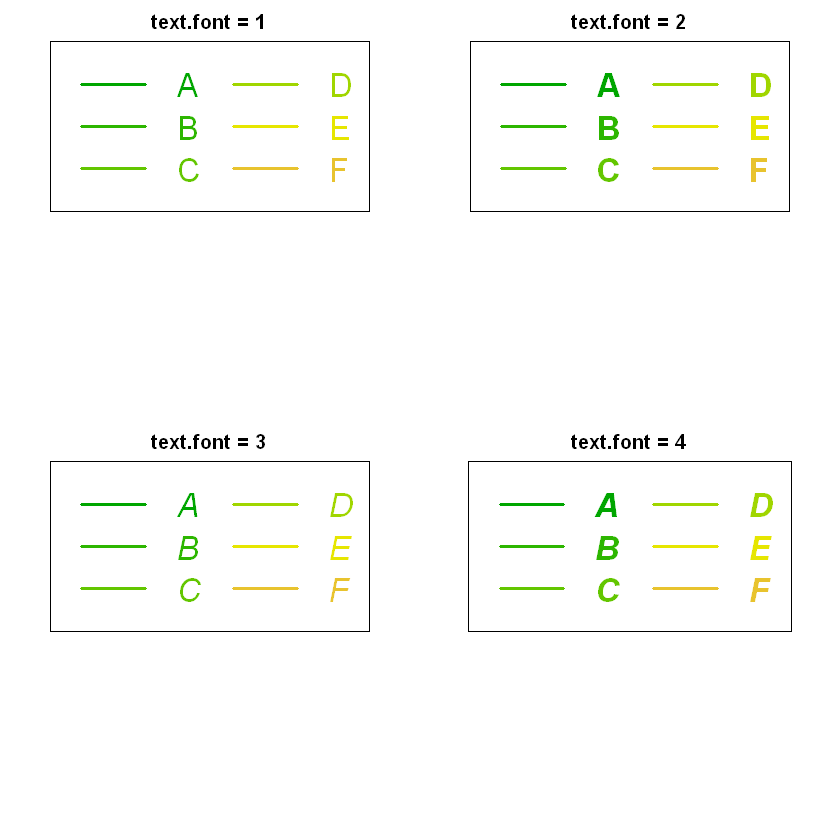

In [2]:
example(legend)